<a href="https://colab.research.google.com/github/Khamdanfakhryza/Artificial-Neural-Network/blob/main/Peramalan_Beban_Puncak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np

# Set seed untuk reproducibility
np.random.seed(0)

# Nama trafo
transformer_names = [
    'Trafo Bangetayu', 'Trafo Plamongan', 'Trafo Banjirkanal Timur',
    'Trafo Mangunharjo', 'Trafo Pedurungan', 'Trafo Jatingaleh',
    'Trafo Kaligawe', 'Trafo Semarang Timur', 'Trafo Semarang Barat',
    'Trafo Genuk', 'Trafo Banyumanik', 'Trafo Karangayu',
    'Trafo Tembalang', 'Trafo Jatingaleh', 'Trafo Tugu',
    'Trafo Srondol', 'Trafo Mijen', 'Trafo Semarang Barat',
    'Trafo Jatingaleh', 'Trafo Tegalsari', 'Trafo Mijen',
    'Trafo Karangayu', 'Trafo Johar', 'Trafo Kota Lama',
    'Trafo Tanah Mas'
]

# Fungsi untuk menghasilkan data
def generate_data(num_records):
    data = []
    for _ in range(num_records):
        name = np.random.choice(transformer_names)
        load = np.random.uniform(50, 100)  # Beban antara 50 dan 100
        operating_temp = np.random.uniform(50, 80)  # Suhu operasi antara 50 dan 80
        oil_quality = np.random.uniform(0.5, 1.0)  # Kualitas minyak antara 0.5 dan 1.0
        peak_load = np.random.uniform(120, 160)  # Beban puncak antara 100 dan 220
        lowest_load = np.random.uniform(50, 70)  # Beban terendah antara 50 dan 130
        population = np.random.randint(1600000, 1700000)  # Populasi antara 1.6 juta dan 1.7 juta
        energy_production = np.random.uniform(1e6, 1.5e6)  # Energi produksi antara 1 juta dan 1.5 juta MWh
        beban_puncak_siangan = np.random.uniform(120, 140)  # Beban puncak siang antara 70 dan 90
        beban_puncak_malam = np.random.uniform(70, 90)  # Beban puncak malam antara 90 dan 100
        beban_puncak_acara_khusus = np.random.uniform(100, 120)  # Beban puncak acara khusus antara 100 dan 120
        tahun = np.random.randint(2020, 2024)  # Tahun antara 2020 dan 2030

        data.append([
            round(load, 8), round(operating_temp, 8), round(oil_quality, 9),
            round(peak_load, 8), round(lowest_load, 8), population, round(energy_production, 8),
            round(beban_puncak_siangan, 8), round(beban_puncak_malam, 8), round(beban_puncak_acara_khusus, 8),
            tahun
        ])

    df = pd.DataFrame(data, columns=[
        'Load',
        'Operating Temperature', 'Oil Quality', 'Peak Load',
        'Lowest Load', 'Population', 'Energy Production MWh',
        'Beban Puncak Siang', 'Beban Puncak Malam', 'Beban Puncak Acara Khusus',
        'Tahun'
    ])
    return df

# Generate data
num_records = 566
df = generate_data(num_records)

# Simpan data ke file CSV
df.to_csv('transformer_data.csv', index=False)

print(f"Data berhasil dibuat dan disimpan ke 'transformer_data.csv'.")

Data berhasil dibuat dan disimpan ke 'transformer_data.csv'.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Muat data
df = pd.read_csv('/content/transformer_data.csv')

# Tampilkan beberapa baris data
df.head()




,Load,Operating Temperature,Oil Quality,Peak Load,Lowest Load,Population,Energy Production MWh,Beban Puncak Siang,Beban Puncak Malam,Beban Puncak Acara Khusus,Tahun
0,79.642231,75.327972,0.928973,153.890070,62.471274,1655026,1.218794e+06,137.835460,89.273255,107.668830,2022
1,76.444746,67.041337,0.962798,122.841442,51.742586,1667699,1.184121e+06,139.143103,72.807016,117.401745,2023
2,90.045538,65.614324,0.839440,148.825306,61.640396,1684665,1.472334e+06,130.436966,78.293239,105.291112,2023
3,72.807517,67.053018,0.509395,144.705420,62.241914,1690868,1.193244e+06,138.051970,78.999000,112.261269,2021
4,54.964018,79.094272,0.826570,126.836383,57.163043,1663360,1.157714e+06,127.274215,81.403935,108.772030,2020


from matplotlib import pyplot as plt
_df_0['Load'].plot(kind='hist', bins=20, title='Load')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Operating Temperature'].plot(kind='hist', bins=20, title='Operating Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Oil Quality'].plot(kind='hist', bins=20, title='Oil Quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Peak Load'].plot(kind='hist', bins=20, title='Peak Load')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Load', y='Operating Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Operating Temperature', y='Oil Quality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Oil Quality', y='Peak Load', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Peak Load', y='Lowest Load', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Load'].plot(kind='line', figsize=(8, 4), title='Load')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Operating Temperature'].plot(kind='line', figsize=(8, 4), title='Operating Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Oil Quality'].plot(kind='line', figsize=(8, 4), title='Oil Quality')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Peak Load'].plot(kind='line', figsize=(8, 4), title='Peak Load')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1V3kPlYqW2vVzuj917ivc47F9XhpHMyPQ5nbLP570IMc#gid=0


In [ ]:
# Fitur dan target
X = df[['Peak Load','Lowest Load','Beban Puncak Siang', 'Beban Puncak Malam', 'Beban Puncak Acara Khusus']]
y = df['Peak Load']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitur dan target
X = df[['Load','Operating Temperature', 'Oil Quality', 'Peak Load', 'Lowest Load', 'Population', 'Energy Production MWh','Beban Puncak Siang', 'Beban Puncak Malam', 'Beban Puncak Acara Khusus','Tahun'
]]
y = df['Peak Load']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Buat model ANN
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer untuk regresi

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
12/12 [==============================] - 4s 30ms/step - loss: 19586.1406 - val_loss: 19651.9707
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 19395.7871 - val_loss: 19478.4297
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 19213.6719 - val_loss: 19290.6699
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 19002.1934 - val_loss: 19058.4512
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 18736.2871 - val_loss: 18761.3281
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 18398.4102 - val_loss: 18388.1133
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 17976.6875 - val_loss: 17921.8535
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 17458.9883 - val_loss: 17352.4004
Epoch 9/50
12/12 [==============================] - 0s 9ms/step - loss: 16825.8730 - val_loss: 16672.5859
Epoch 10/50
12/12 [=========================

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

# Hitung MSE dan MAPE
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Errorr: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")


4/4 [==============================] - 0s 13ms/step
Mean Squared Errorr: 201.54261567975362
Mean Absolute Percentage Error: 0.08189043936472133


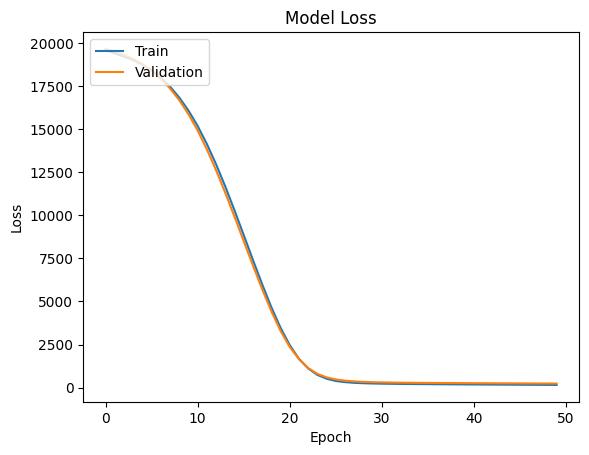

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


4/4 [==============================] - 0s 4ms/step


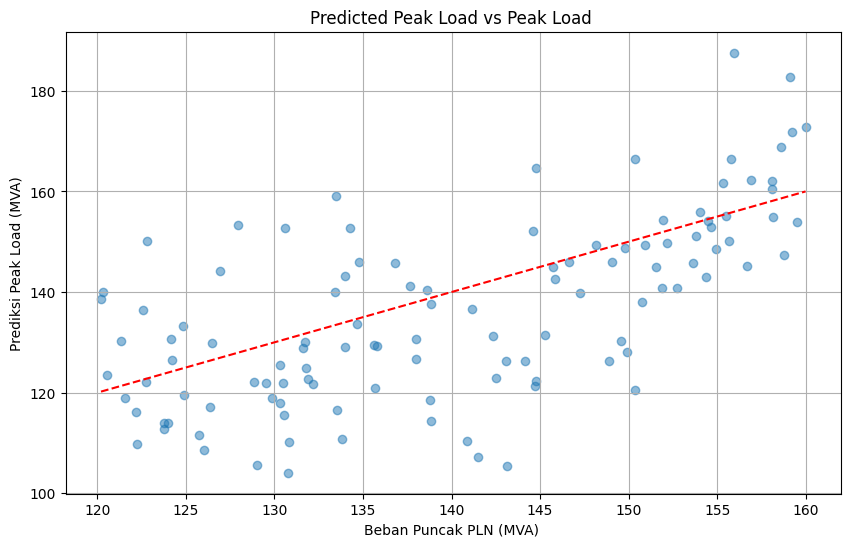

In [ ]:
import matplotlib.pyplot as plt

# Prediksi
y_pred = model.predict(X_test)

# Visualisasi prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted Peak Load vs Peak Load ')
plt.xlabel('Beban Puncak PLN (MVA) ')
plt.ylabel('Prediksi Peak Load (MVA)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.grid(True)
plt.show()

#plt.plot(df['Tahun'], df['Peak Load'], label='Peak Load')
#plt.plot(df['Tahun'], df['Lowest Load'], label='Lowest Load')
#plt.plot(df['Tahun'], df['Load'], label='Load')
#plt.xlabel('Year')